In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
from datetime import datetime
import prophet

In [3]:
df = pd.read_csv(r'C:\Users\ranje\Downloads\airline_passengers.csv')

In [4]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## <center>Facebook Prophet Model<center>

In [7]:
total = df.groupby(['Month'])[['Thousands of Passengers']].sum().reset_index()

In [8]:
total

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [9]:
df_prophet = total.rename(columns={'Month': 'ds','Thousands of Passengers':'y'})

In [10]:
df_prophet

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [11]:
from prophet import Prophet

In [12]:
m = Prophet()

In [13]:
model = m.fit(df_prophet)

11:10:21 - cmdstanpy - INFO - Chain [1] start processing
11:10:21 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [15]:
future_passengers = model.make_future_dataframe(periods=61, freq='M')

c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [16]:
future_passengers

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
200,1965-08-31
201,1965-09-30
202,1965-10-31
203,1965-11-30


# <center>Prediction<center>

In [17]:
prediction = model.predict(future_passengers)

In [18]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,56.774001,112.011034,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,49.288796,106.157980,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,79.757235,139.150439,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,79.220958,134.593251,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,80.632021,140.049511,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1965-08-31,658.959610,646.271164,704.888406,652.209402,665.840341,17.287630,17.287630,17.287630,17.287630,17.287630,17.287630,0.0,0.0,0.0,676.247240
201,1965-09-30,661.976443,607.588569,668.299541,655.022540,669.072672,-22.544576,-22.544576,-22.544576,-22.544576,-22.544576,-22.544576,0.0,0.0,0.0,639.431867
202,1965-10-31,665.093838,577.760872,638.466454,657.876803,672.400219,-55.707186,-55.707186,-55.707186,-55.707186,-55.707186,-55.707186,0.0,0.0,0.0,609.386652
203,1965-11-30,668.110672,609.762813,667.944591,660.621326,675.555250,-29.067681,-29.067681,-29.067681,-29.067681,-29.067681,-29.067681,0.0,0.0,0.0,639.042990


In [19]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
200,1965-08-31,676.247240,646.271164,704.888406
201,1965-09-30,639.431867,607.588569,668.299541
202,1965-10-31,609.386652,577.760872,638.466454
203,1965-11-30,639.042990,609.762813,667.944591
204,1965-12-31,644.884307,614.597037,672.825002


c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


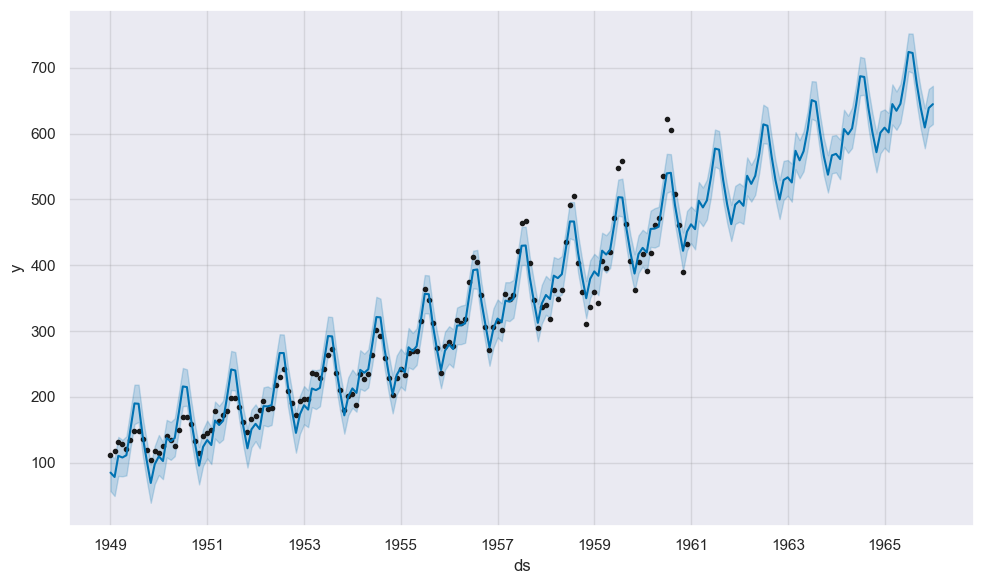

In [20]:
# Plot the model
model.plot(prediction)
plt.show()

c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

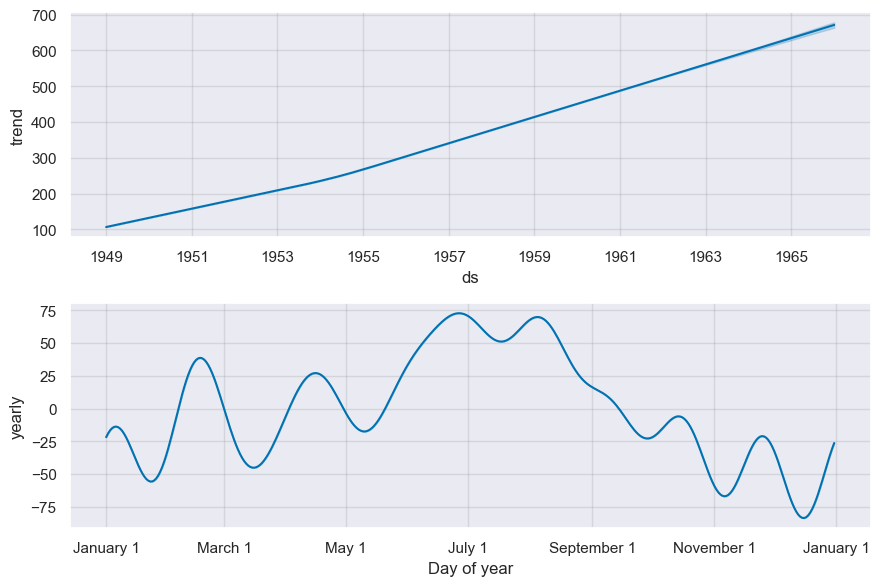

In [21]:
model.plot_components(prediction)
plt.show()

In [22]:
from prophet.plot import add_changepoints_to_plot

c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


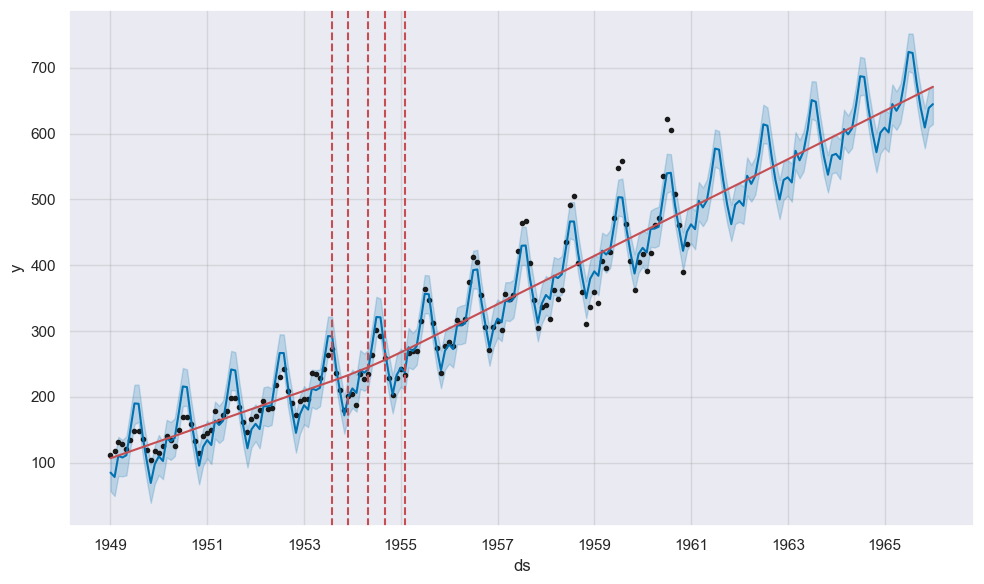

In [23]:
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(),model,prediction)
plt.show()

In [24]:
from prophet.diagnostics import cross_validation

In [27]:
df_cv = cross_validation(model, horizon='30 days',period='15 days')

  0%|          | 0/256 [00:00<?, ?it/s]

11:11:07 - cmdstanpy - INFO - Chain [1] start processing
11:11:14 - cmdstanpy - INFO - Chain [1] done processing
11:11:14 - cmdstanpy - INFO - Chain [1] start processing
11:11:20 - cmdstanpy - INFO - Chain [1] done processing
11:11:20 - cmdstanpy - INFO - Chain [1] start processing
11:11:22 - cmdstanpy - INFO - Chain [1] done processing
11:11:22 - cmdstanpy - INFO - Chain [1] start processing
11:11:24 - cmdstanpy - INFO - Chain [1] done processing
11:11:24 - cmdstanpy - INFO - Chain [1] start processing
11:11:26 - cmdstanpy - INFO - Chain [1] done processing
11:11:26 - cmdstanpy - INFO - Chain [1] start processing
11:11:28 - cmdstanpy - INFO - Chain [1] done processing
11:11:28 - cmdstanpy - INFO - Chain [1] start processing
11:11:29 - cmdstanpy - INFO - Chain [1] done processing
11:11:29 - cmdstanpy - INFO - Chain [1] start processing
11:11:29 - cmdstanpy - INFO - Chain [1] done processing
11:11:29 - cmdstanpy - INFO - Chain [1] start processing
11:11:41 - cmdstanpy - INFO - Chain [1]

In [28]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1950-02-01,149.594866,149.594571,149.595154,126,1950-01-13
1,1950-02-01,149.594866,149.594573,149.595188,126,1950-01-28
2,1950-03-01,173.460479,173.428236,173.497304,141,1950-02-12
3,1950-03-01,173.460479,173.424753,173.492031,141,1950-02-27
4,1950-04-01,127.098341,127.088485,127.109281,135,1950-03-14
...,...,...,...,...,...,...
252,1960-10-01,458.403678,431.853906,487.660440,461,1960-09-02
253,1960-10-01,458.403678,427.757611,485.727192,461,1960-09-17
254,1960-11-01,430.059193,402.024109,458.862475,390,1960-10-02
255,1960-11-01,430.059193,400.897820,456.773155,390,1960-10-17


In [29]:
from prophet.diagnostics import performance_metrics

In [30]:
df_performance = performance_metrics(df_cv)

In [31]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,984.392867,31.375036,20.979355,0.103876,0.054487,0.127279,0.340000
1,5 days,621.102263,24.921923,17.582003,0.080966,0.054487,0.090815,0.413333
2,6 days,1724.470949,41.526750,28.621176,0.126177,0.056707,0.167401,0.316364
3,7 days,1892.475118,43.502587,30.735755,0.131596,0.084024,0.173268,0.240000
4,8 days,1933.604940,43.972775,32.252688,0.142199,0.087288,0.183665,0.160000
5,9 days,483.931557,21.998444,17.518138,0.073248,0.070605,0.071762,0.320000
6,10 days,430.051491,20.737683,17.001230,0.067076,0.063878,0.065324,0.360000
7,11 days,616.097090,24.821303,20.382376,0.067812,0.063442,0.066709,0.301818
8,12 days,1107.486528,33.278920,24.959025,0.070644,0.063643,0.070980,0.320000
9,13 days,1203.124338,34.686083,24.020197,0.060974,0.057770,0.062072,0.373333


In [32]:
from prophet.plot import plot_cross_validation_metric

c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


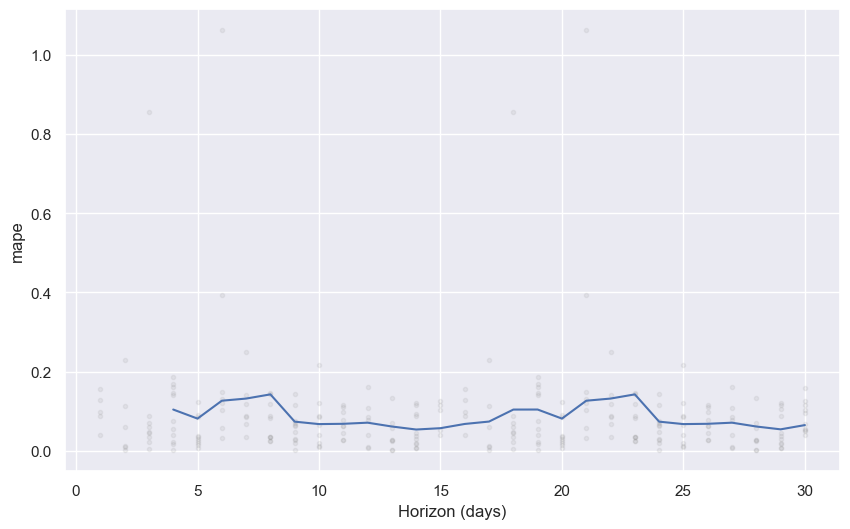

In [36]:
df_performance = plot_cross_validation_metric(df_cv,metric='mape')